In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("Bengaluru_House_Data.csv")

In [3]:
df.shape

(13320, 9)

In [4]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [5]:
df.area_type.value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [7]:
df.corr()

,bath,balcony,price
bath,1.000000,0.204201,0.456345
balcony,0.204201,1.000000,0.120355
price,0.456345,0.120355,1.000000


In [8]:
df1 = df[['location', 'size', 'total_sqft', 'bath', 'price']]

In [9]:
df1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [10]:
df1.isnull().sum() 

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [11]:
df1=df1.dropna()

In [12]:
df1['size'].value_counts()

2 BHK         5198
3 BHK         4286
4 Bedroom      818
4 BHK          577
3 Bedroom      546
1 BHK          531
2 Bedroom      329
5 Bedroom      296
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           57
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: size, dtype: int64

In [13]:
df1['bhk']=df1['size'].apply(lambda x: int(x.split()[0]))

In [14]:
df1.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [15]:
df1['size']=df1['bhk'].astype(str) + " bhk"

In [16]:
def convertfloat(value):
    try:
        x=float(value)
    except:
        splitval=value.split("-")
        if len(splitval)==2:
            x1,x2=splitval
            x = (float(x1)+float(x2))/2
        else:
            x = np.nan
    return x

In [17]:
df2=df1.copy()

In [18]:
df2['total_sqft']=df2['total_sqft'].apply(lambda x: convertfloat(x))

In [19]:
df2= df2.dropna()

<AxesSubplot:xlabel='bhk', ylabel='total_sqft'>

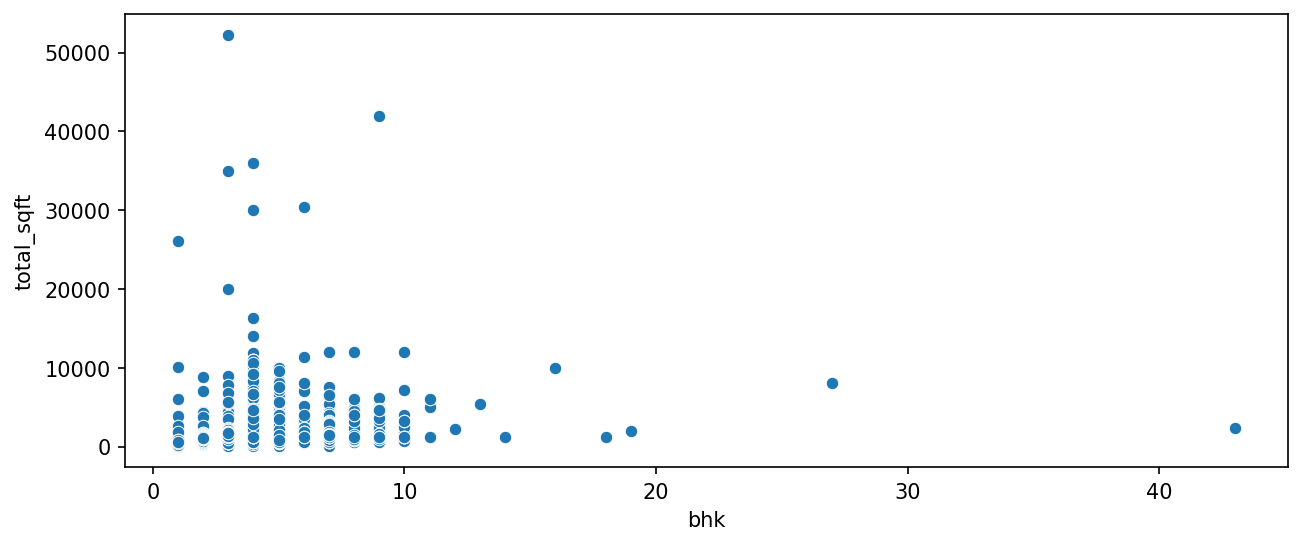

In [20]:
plt.figure(figsize=(10,4),dpi=150)
sns.scatterplot(data=df2,x='bhk',y='total_sqft')

In [21]:
df2[df2['bhk']>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 bhk,8000.0,27.0,230.0,27
4684,Munnekollal,43 bhk,2400.0,40.0,660.0,43


In [22]:
df2['price_per_sqrft']=(df2.price*100000)/df2.total_sqft

In [23]:
df2.price_per_sqrft.describe()

count    1.320000e+04
mean     7.920759e+03
std      1.067272e+05
min      2.678298e+02
25%      4.267701e+03
50%      5.438331e+03
75%      7.317073e+03
max      1.200000e+07
Name: price_per_sqrft, dtype: float64

In [24]:
df2.to_csv("sample.csv")

In [25]:
df2.location = df2.location.apply(lambda x: x.strip())
locationstats=df2.location.value_counts()
locationstats

Whitefield                   533
Sarjapur  Road               392
Electronic City              304
Kanakpura Road               264
Thanisandra                  235
                            ... 
Rajanna Layout                 1
Subramanyanagar                1
Lakshmipura Vidyaanyapura      1
Malur Hosur Road               1
Abshot Layout                  1
Name: location, Length: 1287, dtype: int64

In [26]:
sum(locationstats[(locationstats.values<10)].values)

2732

In [27]:
sum(locationstats.values)

13200

In [28]:
location_less_than_10=locationstats[(locationstats.values<10)].index

In [29]:
df3=df2.copy()

In [30]:
df3.location = df3.location.apply(lambda x: 'other' if x in location_less_than_10 else x)
len(df3.location.unique())

255

In [31]:
df3["location"]= df3["location"].str.upper().str.title()
len(df3.location.unique())

255

In [32]:
df3.columns

Index(['location', 'size', 'total_sqft', 'bath', 'price', 'bhk',
       'price_per_sqrft'],
      dtype='object')

Normally a bhk has a minimum 300 sqft.

In [33]:
len(df3[df3.total_sqft/df3.bhk<300])

744

In [34]:
df4=df3[~(df3.total_sqft/df3.bhk<300)]

In [35]:
df4.shape

(12456, 7)

In [36]:
df5 = df4.copy()
locationlist=df5.location.unique()

In [37]:
df5.price_per_sqrft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqrft, dtype: float64

In [38]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        # Standard Deviation Method
        m = np.mean(subdf.price_per_sqrft)
        st = np.std(subdf.price_per_sqrft)
        reduced_df = subdf[(subdf.price_per_sqrft>(m-st)) & (subdf.price_per_sqrft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df6 = remove_pps_outliers(df5)


In [39]:
df6.shape

(10222, 7)

In [40]:
# import random
# def plot_scatter_chart(df,location,x,y):
#     df6 = df[(df.location==location)]
#     plt.figure(figsize=(10,4),dpi=150)
#     sns.scatterplot(data=df6,x=x,y=y)
#     plt.title(location)

# for i in range(5):
#     plot_scatter_chart(df5,locationlist[random.randint(0,len(locationlist)-1)],"bhk","total_sqft")
    
#     plt.show()

In [41]:
import random
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    plt.figure(figsize=(10,4),dpi=150)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()

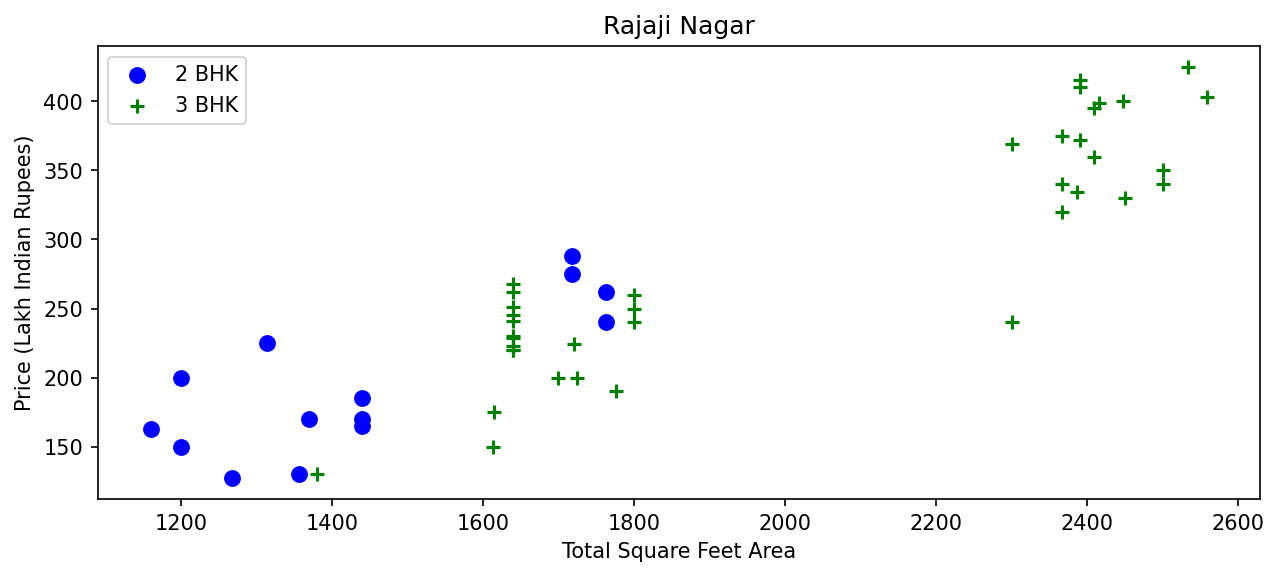

In [42]:
plot_scatter_chart(df6,"Rajaji Nagar")   
# for i in range(5):
#     plot_scatter_chart(df5,locationlist[random.randint(0,len(locationlist)-1)])
#     plt.show()

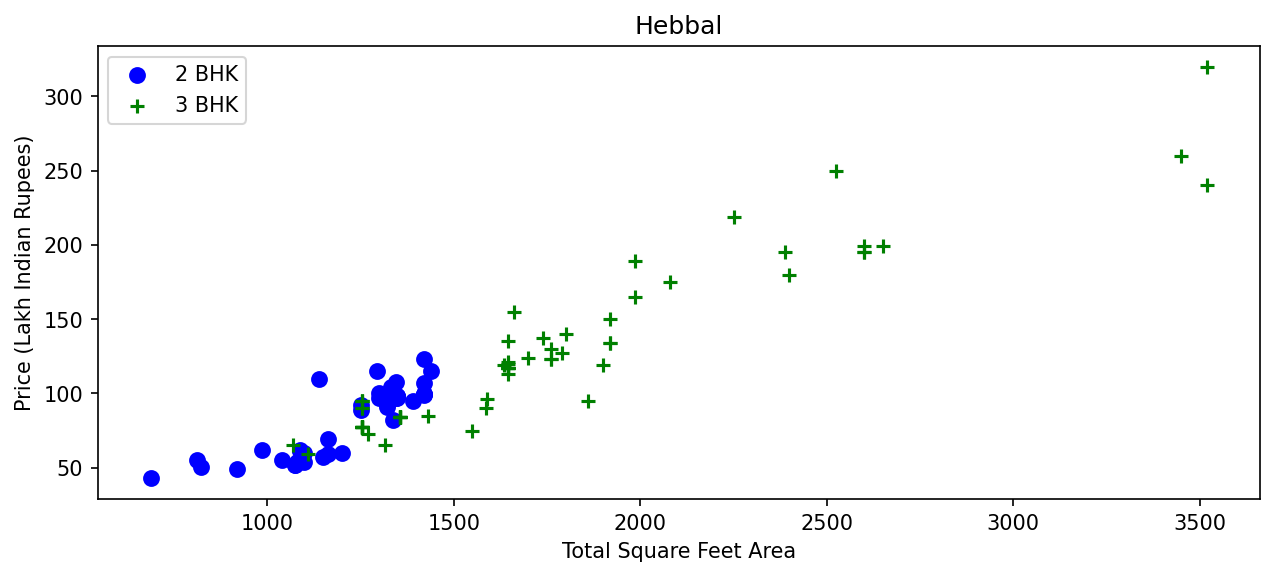

In [43]:
plot_scatter_chart(df6,"Hebbal")

In [44]:
df6.head()
df7=df6.copy()

In [45]:
df7=df6[['location','total_sqft', 'bath', 'price', 'bhk',
       'price_per_sqrft']]

In [46]:
df7.head()

,location,total_sqft,bath,price,bhk,price_per_sqrft
0,1St Block Jayanagar,2850.0,4.0,428.0,4,15017.543860
1,1St Block Jayanagar,1630.0,3.0,194.0,3,11901.840491
2,1St Block Jayanagar,1875.0,2.0,235.0,3,12533.333333
3,1St Block Jayanagar,1200.0,2.0,130.0,3,10833.333333
4,1St Block Jayanagar,1235.0,2.0,148.0,2,11983.805668


In [47]:
def remove_outliers(df):
    df1 = df[['location','price_per_sqrft','bhk']].copy()
    # df1['sd_price_per_sqrft'] = df1['price_per_sqrft']
    df1=df1.reset_index()
    df1 = df1.groupby(['location','bhk'],as_index=False).agg({'price_per_sqrft':'mean','index':'count'})
    print(df1.head())
    df1.columns = ['location','bhk','avg_price_per_sqrft','count_bhklocations']
    print(df1.head())
    df2=pd.DataFrame()
    for location, subdf in df1.groupby(['location']):
        subdf=subdf.sort_values(by='bhk',ascending=True)
        subdf['new_avg_price_per_sqrft']=subdf['avg_price_per_sqrft'].shift(-1,fill_value=0)
        df2=pd.concat([df2,subdf],ignore_index=True)  
    df=pd.merge(df,df2,on=['location','bhk'],how='left')
    df.sort_values(by=['location','bhk'],inplace=True,ignore_index=True,ascending=True)
    # df['outliers'] = np.where(((df['count_bhklocations']>=10) & (df['price_per_sqrft']>df['new_avg_price_per_sqrft'])
    # & (df['new_avg_price_per_sqrft']>0)),1,0)
    # df = df[df.outliers==0]
    df = df[~((df['count_bhklocations']>=10) & (df['price_per_sqrft']>df['new_avg_price_per_sqrft'])
    & (df['new_avg_price_per_sqrft']>0) )]
    return df

df8 = remove_outliers(df7)
print(df8.head(20))

                location  bhk  price_per_sqrft  index
0    1St Block Jayanagar    2     11983.805668      1
1    1St Block Jayanagar    3     11756.169052      3
2    1St Block Jayanagar    4     15018.711280      3
3  1St Block Koramangala    2      7695.065330      2
4  1St Block Koramangala    3      8936.170213      1
                location  bhk  avg_price_per_sqrft  count_bhklocations
0    1St Block Jayanagar    2         11983.805668                   1
1    1St Block Jayanagar    3         11756.169052                   3
2    1St Block Jayanagar    4         15018.711280                   3
3  1St Block Koramangala    2          7695.065330                   2
4  1St Block Koramangala    3          8936.170213                   1
                 location  total_sqft  bath  price  bhk  price_per_sqrft  \
0     1St Block Jayanagar      1235.0   2.0  148.0    2     11983.805668   
1     1St Block Jayanagar      1630.0   3.0  194.0    3     11901.840491   
2     1St Block Jayana

In [48]:
df8.shape

(7615, 9)

In [49]:
df8['price_per_sqrft1']=df8['price_per_sqrft']

In [50]:
df8.shape

(7615, 10)

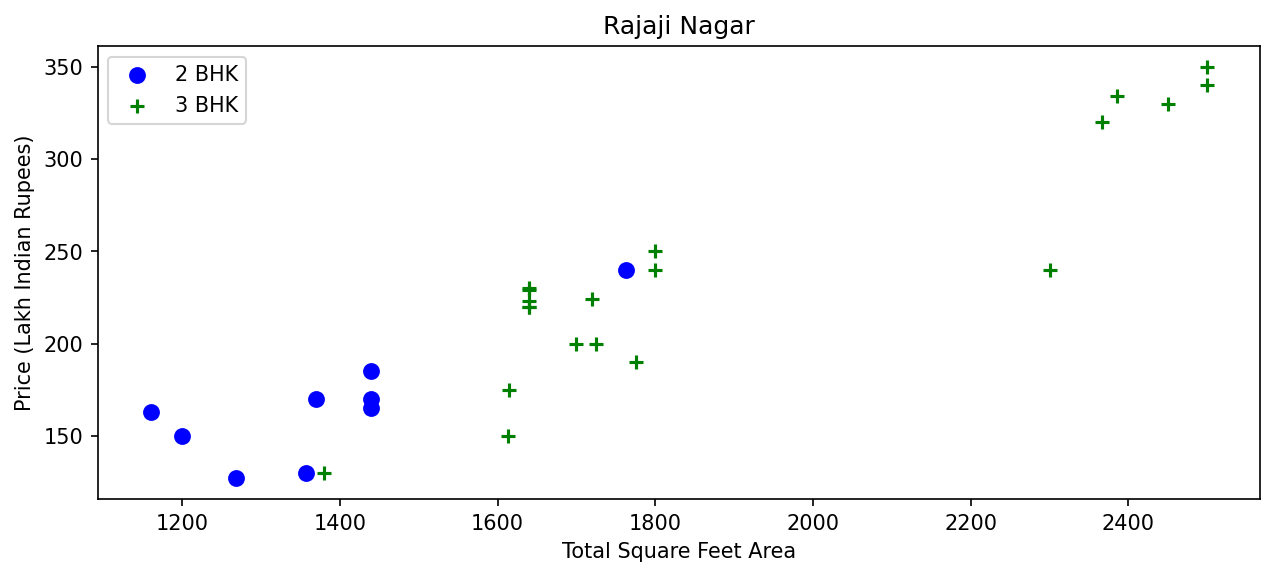

In [51]:
plot_scatter_chart(df8,"Rajaji Nagar")   
# for i in range(5):
#     plot_scatter_chart(df5,locationlist[random.randint(0,len(locationlist)-1)])
#     plt.show()

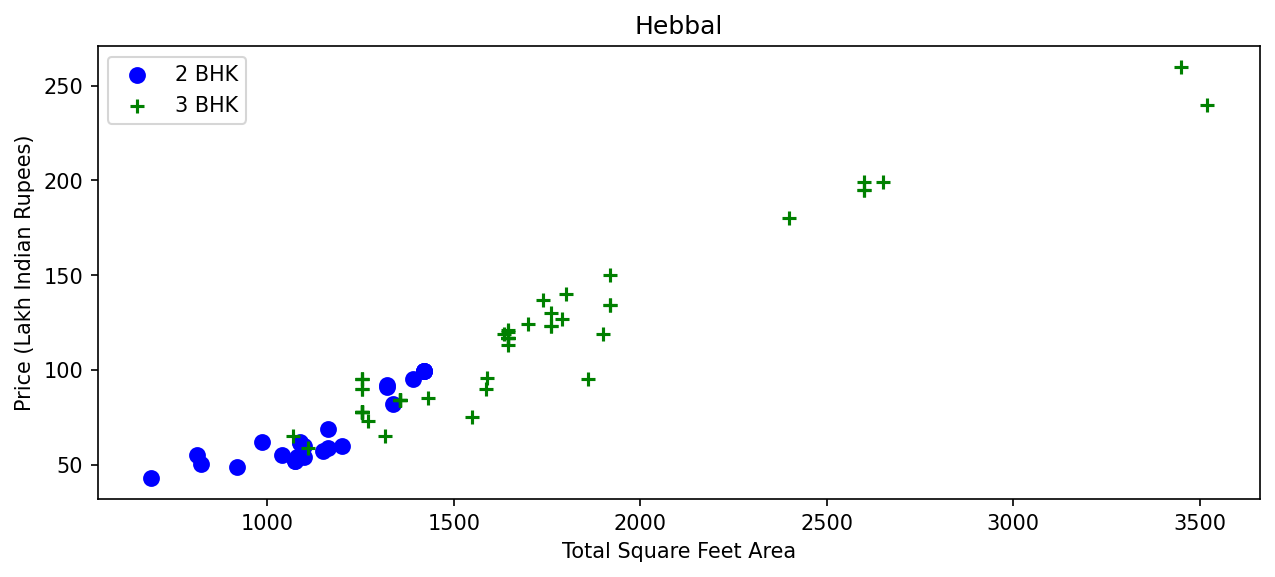

In [52]:
plot_scatter_chart(df8,"Hebbal")

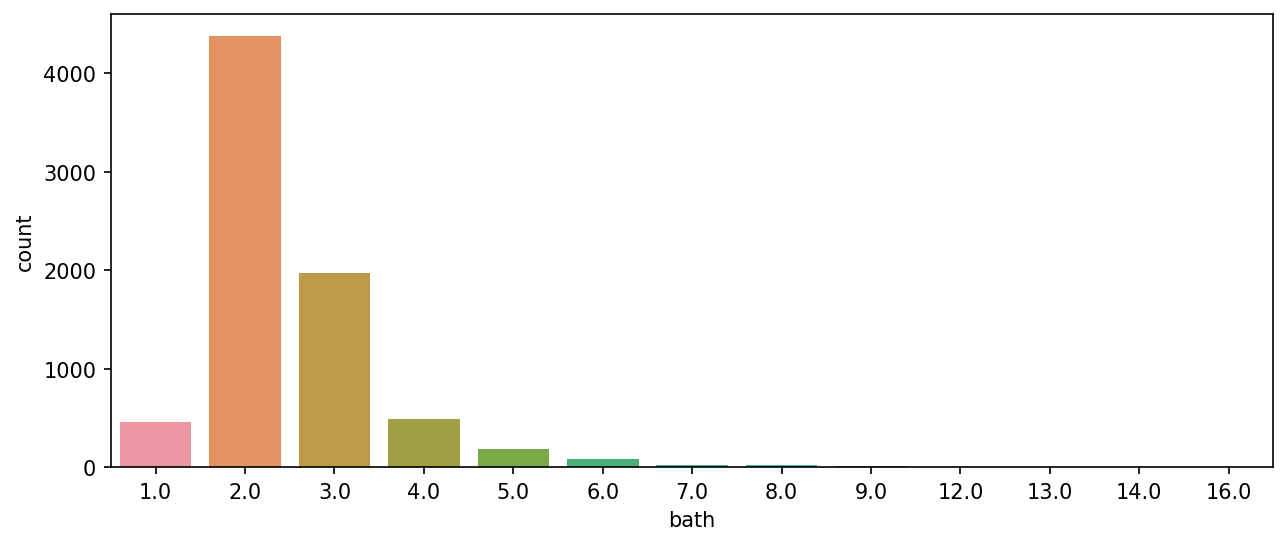

In [53]:
plt.figure(figsize=(10,4),dpi=150)
sns.countplot(x='bath',data=df8);

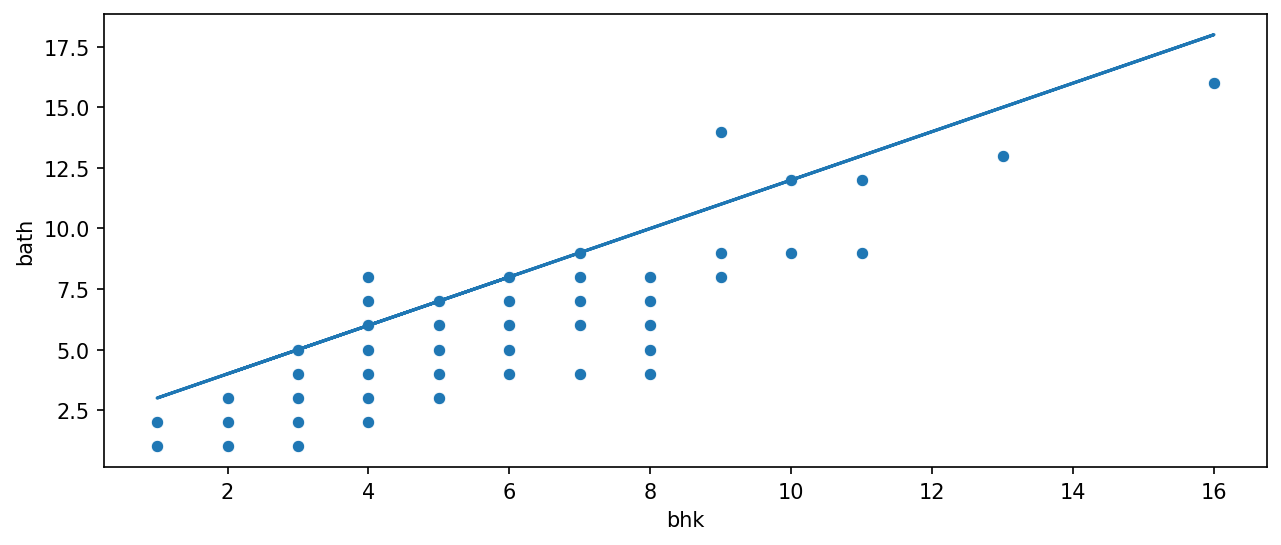

In [54]:
plt.figure(figsize=(10,4),dpi=150)
sns.scatterplot(x='bhk',y='bath',data=df8)
plt.plot(df8.bhk,(df8['bhk']+2));

It is unusual to have more than 2 bathrooms in a bhk.

In [55]:
df8[df8.bath>df8.bhk+2]

,location,total_sqft,bath,price,bhk,price_per_sqrft,avg_price_per_sqrft,count_bhklocations,new_avg_price_per_sqrft,price_per_sqrft1
1387,Btm 1St Stage,3300.0,14.0,500.0,9,15151.515152,15151.515152,1,0.000000,15151.515152
1617,Chikkabanavar,2460.0,7.0,80.0,4,3252.032520,3252.032520,1,3645.833333,3252.032520
5291,Nagasandra,7000.0,8.0,450.0,4,6428.571429,6235.119048,2,0.000000,6428.571429


In [56]:
df9 = df8[df8.bath<df8.bhk+2]
df9.shape

(7551, 10)

In [57]:
df9.head()

,location,total_sqft,bath,price,bhk,price_per_sqrft,avg_price_per_sqrft,count_bhklocations,new_avg_price_per_sqrft,price_per_sqrft1
0,1St Block Jayanagar,1235.0,2.0,148.0,2,11983.805668,11983.805668,1,11756.169052,11983.805668
1,1St Block Jayanagar,1630.0,3.0,194.0,3,11901.840491,11756.169052,3,15018.711280,11901.840491
2,1St Block Jayanagar,1875.0,2.0,235.0,3,12533.333333,11756.169052,3,15018.711280,12533.333333
3,1St Block Jayanagar,1200.0,2.0,130.0,3,10833.333333,11756.169052,3,15018.711280,10833.333333
4,1St Block Jayanagar,2850.0,4.0,428.0,4,15017.543860,15018.711280,3,0.000000,15017.543860


In [58]:
df10 = df9[['location', 'total_sqft', 'bath', 'price', 'bhk']]

One Hot Encoding

In [59]:
dummies = pd.get_dummies(df10.location)
dummies.head(3)

,1St Block Jayanagar,1St Block Koramangala,1St Phase Jp Nagar,2Nd Phase Judicial Layout,2Nd Stage Nagarbhavi,5Th Block Hbr Layout,5Th Phase Jp Nagar,6Th Phase Jp Nagar,7Th Phase Jp Nagar,8Th Phase Jp Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
df11 = pd.concat([df10,dummies.drop('Other',axis='columns')],axis='columns')
df11.head()

,location,total_sqft,bath,price,bhk,1St Block Jayanagar,1St Block Koramangala,1St Phase Jp Nagar,2Nd Phase Judicial Layout,2Nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1St Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1St Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1St Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1St Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1St Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
df12 = df11.drop('location',axis='columns')
df12.head()

,total_sqft,bath,price,bhk,1St Block Jayanagar,1St Block Koramangala,1St Phase Jp Nagar,2Nd Phase Judicial Layout,2Nd Stage Nagarbhavi,5Th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
df12.shape

(7551, 258)

In [63]:
X = df12.drop(['price'],axis='columns')
X.head()

,total_sqft,bath,bhk,1St Block Jayanagar,1St Block Koramangala,1St Phase Jp Nagar,2Nd Phase Judicial Layout,2Nd Stage Nagarbhavi,5Th Block Hbr Layout,5Th Phase Jp Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
y = df12.price
y.head()

0    148.0
1    194.0
2    235.0
3    130.0
4    428.0
Name: price, dtype: float64

In [65]:
X.shape

(7551, 257)

In [66]:
y.shape

(7551,)

In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [68]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.8597952327790321

## K Fold Linear Regression to measure the accuracy of the linear regression model

In [69]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.84689298, 0.80723226, 0.7854068 , 0.84207279, 0.85273981])

## Testing with other algorithm

# Grid Search to find the best model

In [70]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
import warnings
warnings.filterwarnings("ignore")
def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.826869,{'normalize': False}
1,lasso,0.655037,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.752674,"{'criterion': 'mse', 'splitter': 'best'}"


In [71]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]
predict_price('Hebbal',1600, 2, 2)

114.11640190546453

Exporting to a pickle file

In [72]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

In [73]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))